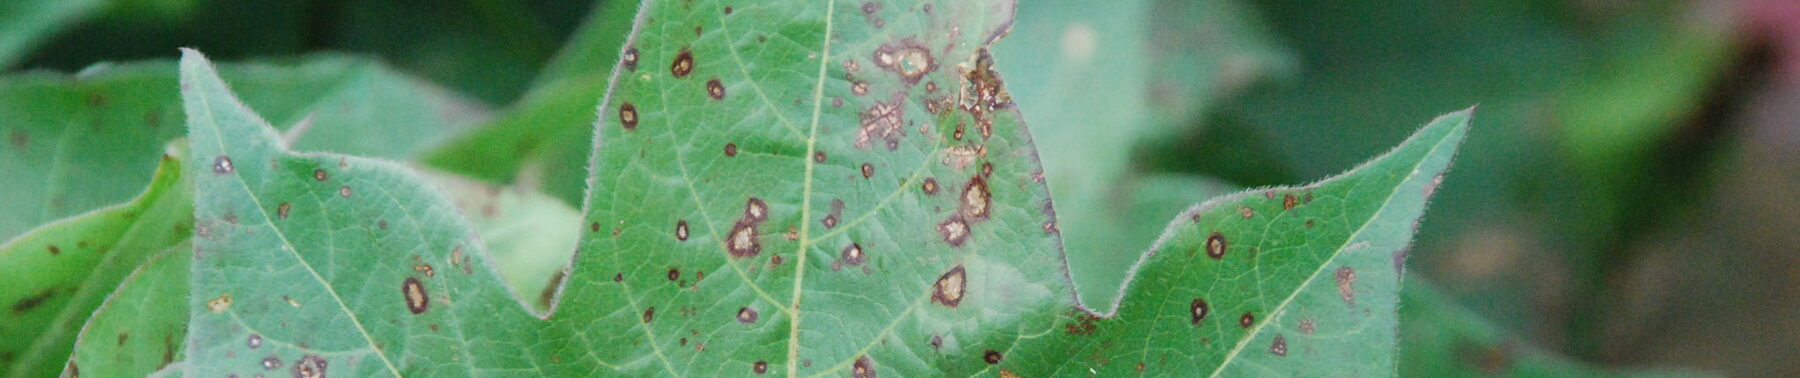

In [1]:
from IPython.display import display
from PIL import Image

# load the image file into a PIL image object
img = Image.open('dataset-cover.jpg')

# display the image in the notebook
display(img)

# Import Libraries

In [2]:
import os 
import glob as gb
import cv2
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from tqdm import tqdm
from sklearn.metrics import precision_score, accuracy_score, recall_score, confusion_matrix, ConfusionMatrixDisplay ,f1_score
import warnings
warnings.filterwarnings('ignore')


# Load Dataset

In [3]:
trainpath = "D:/Neural/Project/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/"
predpath  = "D:/Neural/Project/test/test/"
testpath = "D:/Neural/Project/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/"

In [4]:
extension=[]
for folder in tqdm(os.listdir(trainpath)):
    for file in os.listdir(trainpath+"/"+folder+"/"):
        if os.path.isfile(trainpath+"/"+folder+"/"+file):
            extension.append ( os.path.splitext(file)[1])

100%|██████████████████████████████████████████████████████████████████████████████████| 38/38 [00:05<00:00,  6.93it/s]


In [5]:
print(len(extension))

70295


In [6]:
for folder in tqdm(os.listdir(testpath)):
    for file in os.listdir(testpath+"/"+folder+"/"):
        if os.path.isfile(testpath+"/"+folder+"/"+file):
            extension.append ( os.path.splitext(file)[1])

100%|██████████████████████████████████████████████████████████████████████████████████| 38/38 [00:01<00:00, 36.68it/s]


In [7]:
print(np.unique(extension))

['.JPG' '.jpg']


In [8]:
print(len(extension))

87867


In [9]:
for folder in tqdm(os.listdir(predpath)):
        if os.path.isfile(predpath+"/"+folder):
            extension.append ( os.path.splitext(folder)[1])

100%|███████████████████████████████████████████████████████████████████████████████| 33/33 [00:00<00:00, 16497.26it/s]


In [10]:
print(np.unique(extension))

['.JPG' '.jpg']


In [11]:
print(len(extension))

87900


# Dimension of images

In [12]:
size = []
count=[]
for folder in tqdm(os.listdir(trainpath)):
    files = gb.glob(pathname= str(trainpath + "/" + folder + "/*.JPG")) #+ \
#             gb.glob(os.path.join(trainpath, folder, '*.jpg'))
    for file in files :
        image = cv2.imread(file)
        size.append(image.shape)
        
pd.Series(size).value_counts()

100%|██████████████████████████████████████████████████████████████████████████████████| 38/38 [01:01<00:00,  1.61s/it]


(256, 256, 3)    70295
dtype: int64

In [13]:
count.append(len(size))

In [14]:
size = []
for folder in tqdm(os.listdir(testpath)):
    files = gb.glob(pathname= str(testpath + "/" + folder + "/*.JPG")) #+ \
#             gb.glob(os.path.join(testpath, folder, '*.jpg'))
    for file in files :
        image = cv2.imread(file)
        size.append(image.shape)
        
pd.Series(size).value_counts()

100%|██████████████████████████████████████████████████████████████████████████████████| 38/38 [00:14<00:00,  2.58it/s]


(256, 256, 3)    17572
dtype: int64

In [15]:
count.append(len(size))

In [16]:
count.append(33)

In [17]:
count

[70295, 17572, 33]

# Data Distribution

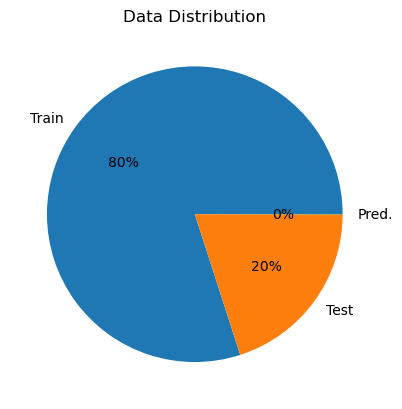

In [18]:
labels=["Train","Test","Pred."]
# Create the pie chart
plt.pie(count, labels=labels, autopct='%1.0f%%')

# Add a title to the pie chart
plt.title('Data Distribution')

# Display the pie chart
plt.show()

# Train Data Distribution

In [19]:
values=[]
labels=[]
for folder in tqdm(os.listdir(trainpath)):
    files = gb.glob(pathname= str(trainpath + "/" + folder + "/*.JPG")) #+ \
#             gb.glob(os.path.join(trainpath, folder, '*.jpg'))
    print(f'for traing data ,{len(files)} in folder {folder}')
    values.append(len(files))
    labels.append(folder)

 39%|███████████████████████████████▉                                                 | 15/38 [00:00<00:00, 139.93it/s]

for traing data ,2016 in folder Apple___Apple_scab
for traing data ,1987 in folder Apple___Black_rot
for traing data ,1760 in folder Apple___Cedar_apple_rust
for traing data ,2008 in folder Apple___healthy
for traing data ,1816 in folder Blueberry___healthy
for traing data ,1826 in folder Cherry_(including_sour)___healthy
for traing data ,1683 in folder Cherry_(including_sour)___Powdery_mildew
for traing data ,1642 in folder Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot
for traing data ,1907 in folder Corn_(maize)___Common_rust_
for traing data ,1859 in folder Corn_(maize)___healthy
for traing data ,1908 in folder Corn_(maize)___Northern_Leaf_Blight
for traing data ,1888 in folder Grape___Black_rot
for traing data ,1920 in folder Grape___Esca_(Black_Measles)
for traing data ,1692 in folder Grape___healthy
for traing data ,1722 in folder Grape___Leaf_blight_(Isariopsis_Leaf_Spot)
for traing data ,2010 in folder Orange___Haunglongbing_(Citrus_greening)
for traing data ,1838 in folde

100%|█████████████████████████████████████████████████████████████████████████████████| 38/38 [00:00<00:00, 139.10it/s]

for traing data ,1702 in folder Tomato___Bacterial_spot
for traing data ,1920 in folder Tomato___Early_blight
for traing data ,1926 in folder Tomato___healthy
for traing data ,1851 in folder Tomato___Late_blight
for traing data ,1882 in folder Tomato___Leaf_Mold
for traing data ,1745 in folder Tomato___Septoria_leaf_spot
for traing data ,1741 in folder Tomato___Spider_mites Two-spotted_spider_mite
for traing data ,1827 in folder Tomato___Target_Spot
for traing data ,1790 in folder Tomato___Tomato_mosaic_virus
for traing data ,1961 in folder Tomato___Tomato_Yellow_Leaf_Curl_Virus


<Axes: title={'center': 'Train data distribution '}, xlabel='Number of image', ylabel='Plant dieases'>

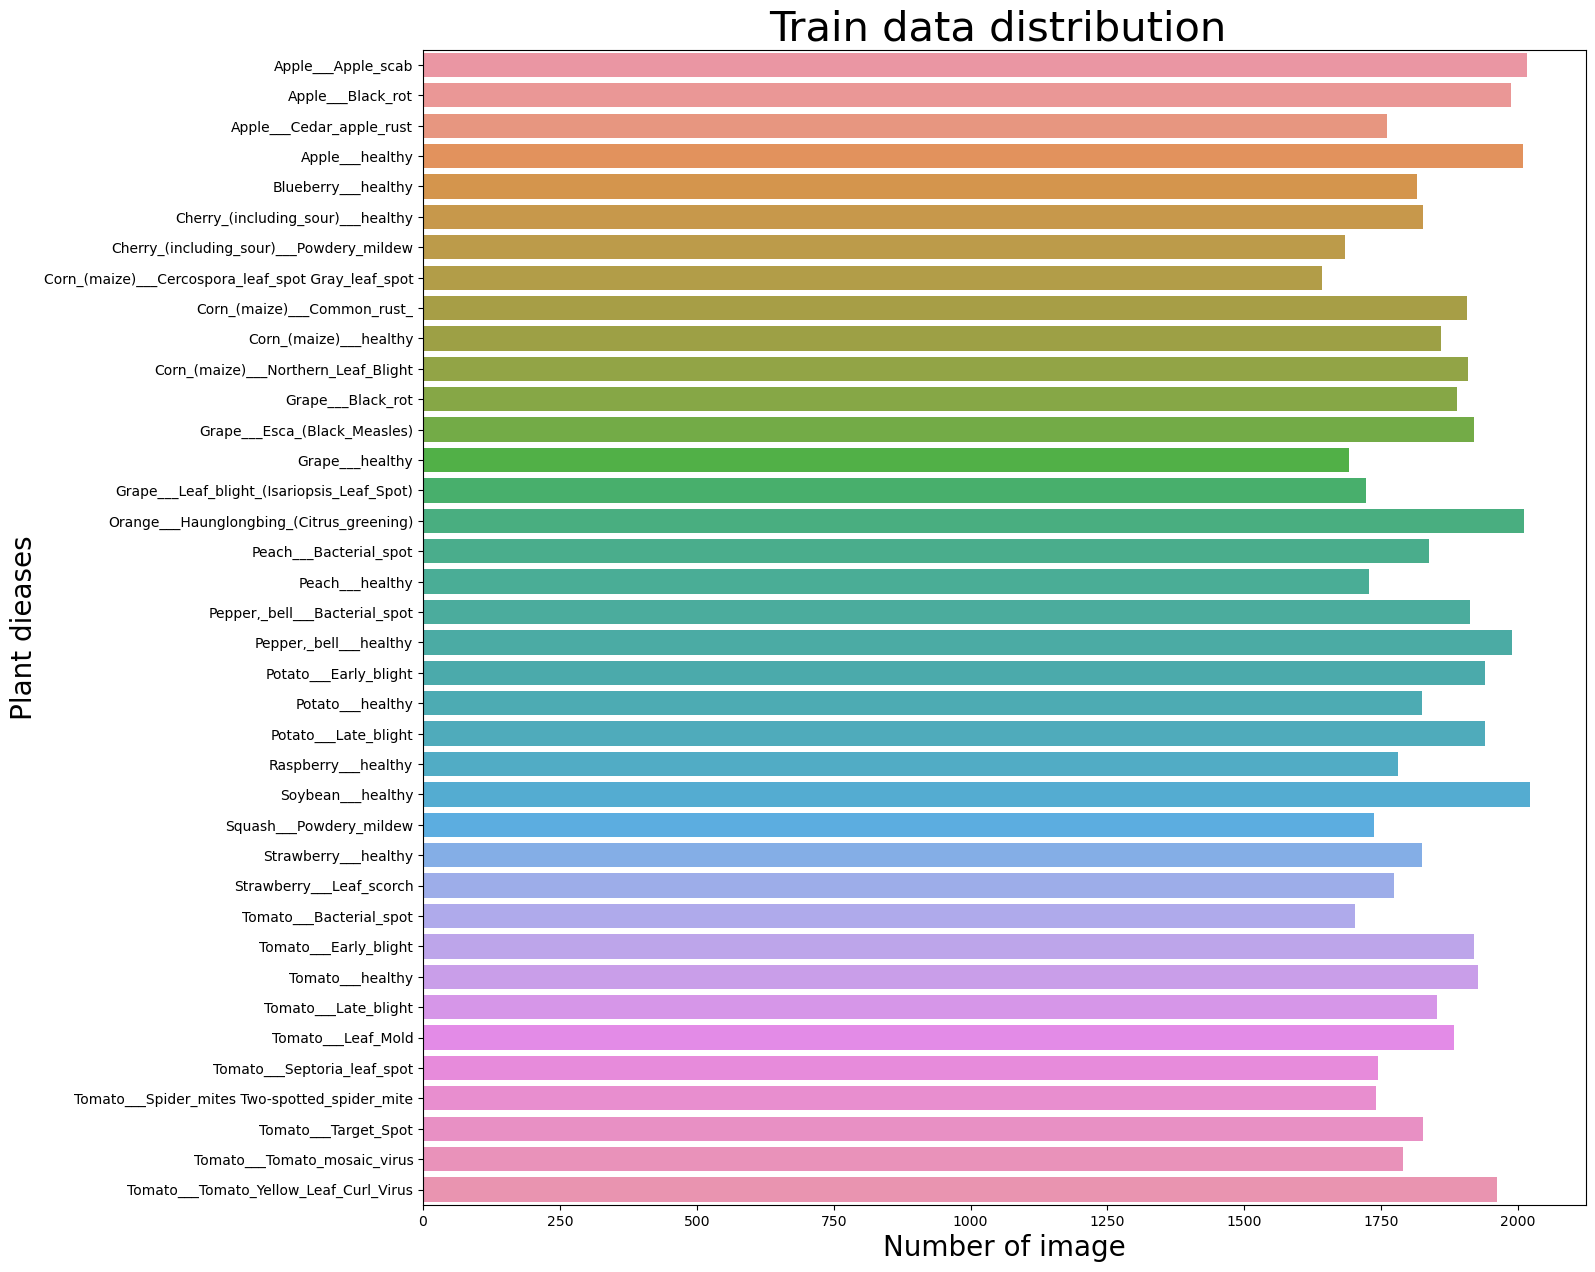

In [20]:
plt.figure(figsize=(15,15))
plt.title('Train data distribution ',fontsize=30)
plt.xlabel('Number of image',fontsize=20)
plt.ylabel('Plant dieases',fontsize=20)

keys = list(labels)
# get values in the same order as keys, and parse percentage values
vals = list(values)
sns.barplot(y=keys, x=vals)

# Test Data Distribution

In [21]:
values=[]
labels=[]
for folder in tqdm(os.listdir(testpath)):
    files = gb.glob(pathname= str(testpath + "/" + folder + "/*.JPG")) #+ \
#             gb.glob(os.path.join(testpath, folder, '*.jpg'))
    print(f'for testing data ,{len(files)} in folder {folder}')
    values.append(len(files))
    labels.append(folder)

100%|█████████████████████████████████████████████████████████████████████████████████| 38/38 [00:00<00:00, 542.86it/s]

for testing data ,504 in folder Apple___Apple_scab
for testing data ,497 in folder Apple___Black_rot
for testing data ,440 in folder Apple___Cedar_apple_rust
for testing data ,502 in folder Apple___healthy
for testing data ,454 in folder Blueberry___healthy
for testing data ,456 in folder Cherry_(including_sour)___healthy
for testing data ,421 in folder Cherry_(including_sour)___Powdery_mildew
for testing data ,410 in folder Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot
for testing data ,477 in folder Corn_(maize)___Common_rust_
for testing data ,465 in folder Corn_(maize)___healthy
for testing data ,477 in folder Corn_(maize)___Northern_Leaf_Blight
for testing data ,472 in folder Grape___Black_rot
for testing data ,480 in folder Grape___Esca_(Black_Measles)
for testing data ,423 in folder Grape___healthy
for testing data ,430 in folder Grape___Leaf_blight_(Isariopsis_Leaf_Spot)
for testing data ,503 in folder Orange___Haunglongbing_(Citrus_greening)
for testing data ,459 in folde

<Axes: title={'center': 'Test data distribution '}, xlabel='Number of image', ylabel='Plant dieases'>

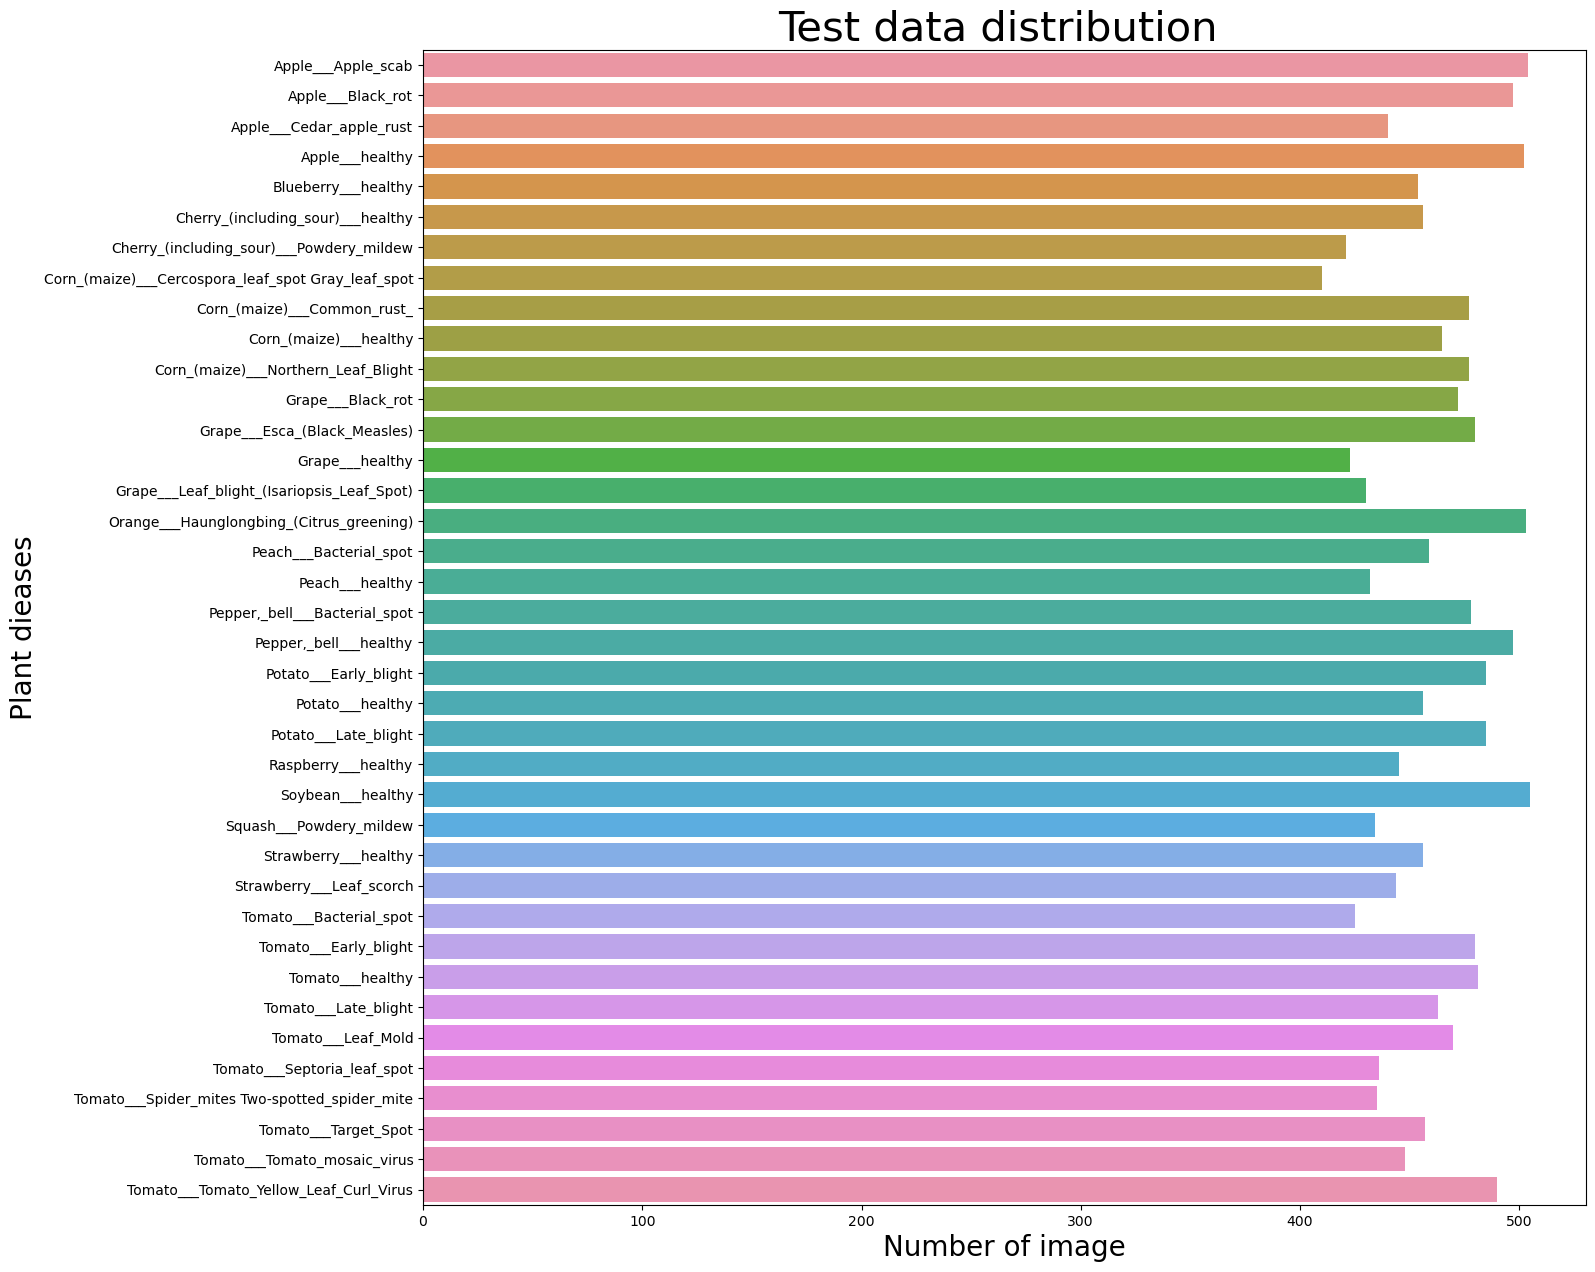

In [22]:
plt.figure(figsize=(15,15))
plt.title('Test data distribution ',fontsize=30)
plt.xlabel('Number of image',fontsize=20)
plt.ylabel('Plant dieases',fontsize=20)

keys = list(labels)
# get values in the same order as keys, and parse percentage values
vals = list(values)
sns.barplot(y=keys, x=vals)

# Pred. Data Distribution

In [23]:
files = gb.glob(pathname= str(predpath + "/*.JPG"))#+ \
#             gb.glob(os.path.join(predpath, folder, '*.jpg'))
print(f'for pred. data ,{len(files)} image ')

for pred. data ,33 image 


# Categories in Dataset

In [24]:
lis=[]
for folder in tqdm(os.listdir(trainpath)):
    if folder not in lis :
        lis.append(folder)

100%|██████████████████████████████████████████████████████████████████████████████████████████| 38/38 [00:00<?, ?it/s]


In [25]:

for folder in tqdm(os.listdir(testpath)):
    if folder not in lis :
        lis.append(folder)

100%|███████████████████████████████████████████████████████████████████████████████| 38/38 [00:00<00:00, 37741.78it/s]


In [26]:
lis



['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___healthy',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___healthy',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___healthy',
 'Potato___Late_blight',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___healthy',
 'Strawberry___Leaf_scorch',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___healthy',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spid

In [27]:
code = {key: value for value, key in enumerate(lis)}

print(code)

{'Apple___Apple_scab': 0, 'Apple___Black_rot': 1, 'Apple___Cedar_apple_rust': 2, 'Apple___healthy': 3, 'Blueberry___healthy': 4, 'Cherry_(including_sour)___healthy': 5, 'Cherry_(including_sour)___Powdery_mildew': 6, 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7, 'Corn_(maize)___Common_rust_': 8, 'Corn_(maize)___healthy': 9, 'Corn_(maize)___Northern_Leaf_Blight': 10, 'Grape___Black_rot': 11, 'Grape___Esca_(Black_Measles)': 12, 'Grape___healthy': 13, 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 14, 'Orange___Haunglongbing_(Citrus_greening)': 15, 'Peach___Bacterial_spot': 16, 'Peach___healthy': 17, 'Pepper,_bell___Bacterial_spot': 18, 'Pepper,_bell___healthy': 19, 'Potato___Early_blight': 20, 'Potato___healthy': 21, 'Potato___Late_blight': 22, 'Raspberry___healthy': 23, 'Soybean___healthy': 24, 'Squash___Powdery_mildew': 25, 'Strawberry___healthy': 26, 'Strawberry___Leaf_scorch': 27, 'Tomato___Bacterial_spot': 28, 'Tomato___Early_blight': 29, 'Tomato___healthy': 30, 'Tomato___L

In [28]:
def getcode(n) :    
    for x ,y in code.items() :
        if n == y :
            return x

# New size of images 

In [29]:
s=100

# Reading and Visualization Train Data

In [30]:
X_train=[]
Y_train=[]
for folder in tqdm(os.listdir(trainpath)):
    files = gb.glob(pathname= str(trainpath + "/" + folder + "/*.JPG")) #+ \
#             gb.glob(os.path.join(trainpath, folder, '*.jpg'))
    for file in files :
        image = cv2.imread(file)
        image_resized = cv2.resize(image,(s,s))
        X_train.append(list(image_resized))
        Y_train.append(code[folder])

100%|██████████████████████████████████████████████████████████████████████████████████| 38/38 [01:13<00:00,  1.94s/it]


In [31]:
print(np.array(X_train).shape)
print(np.array(Y_train).shape)

(70295, 100, 100, 3)
(70295,)


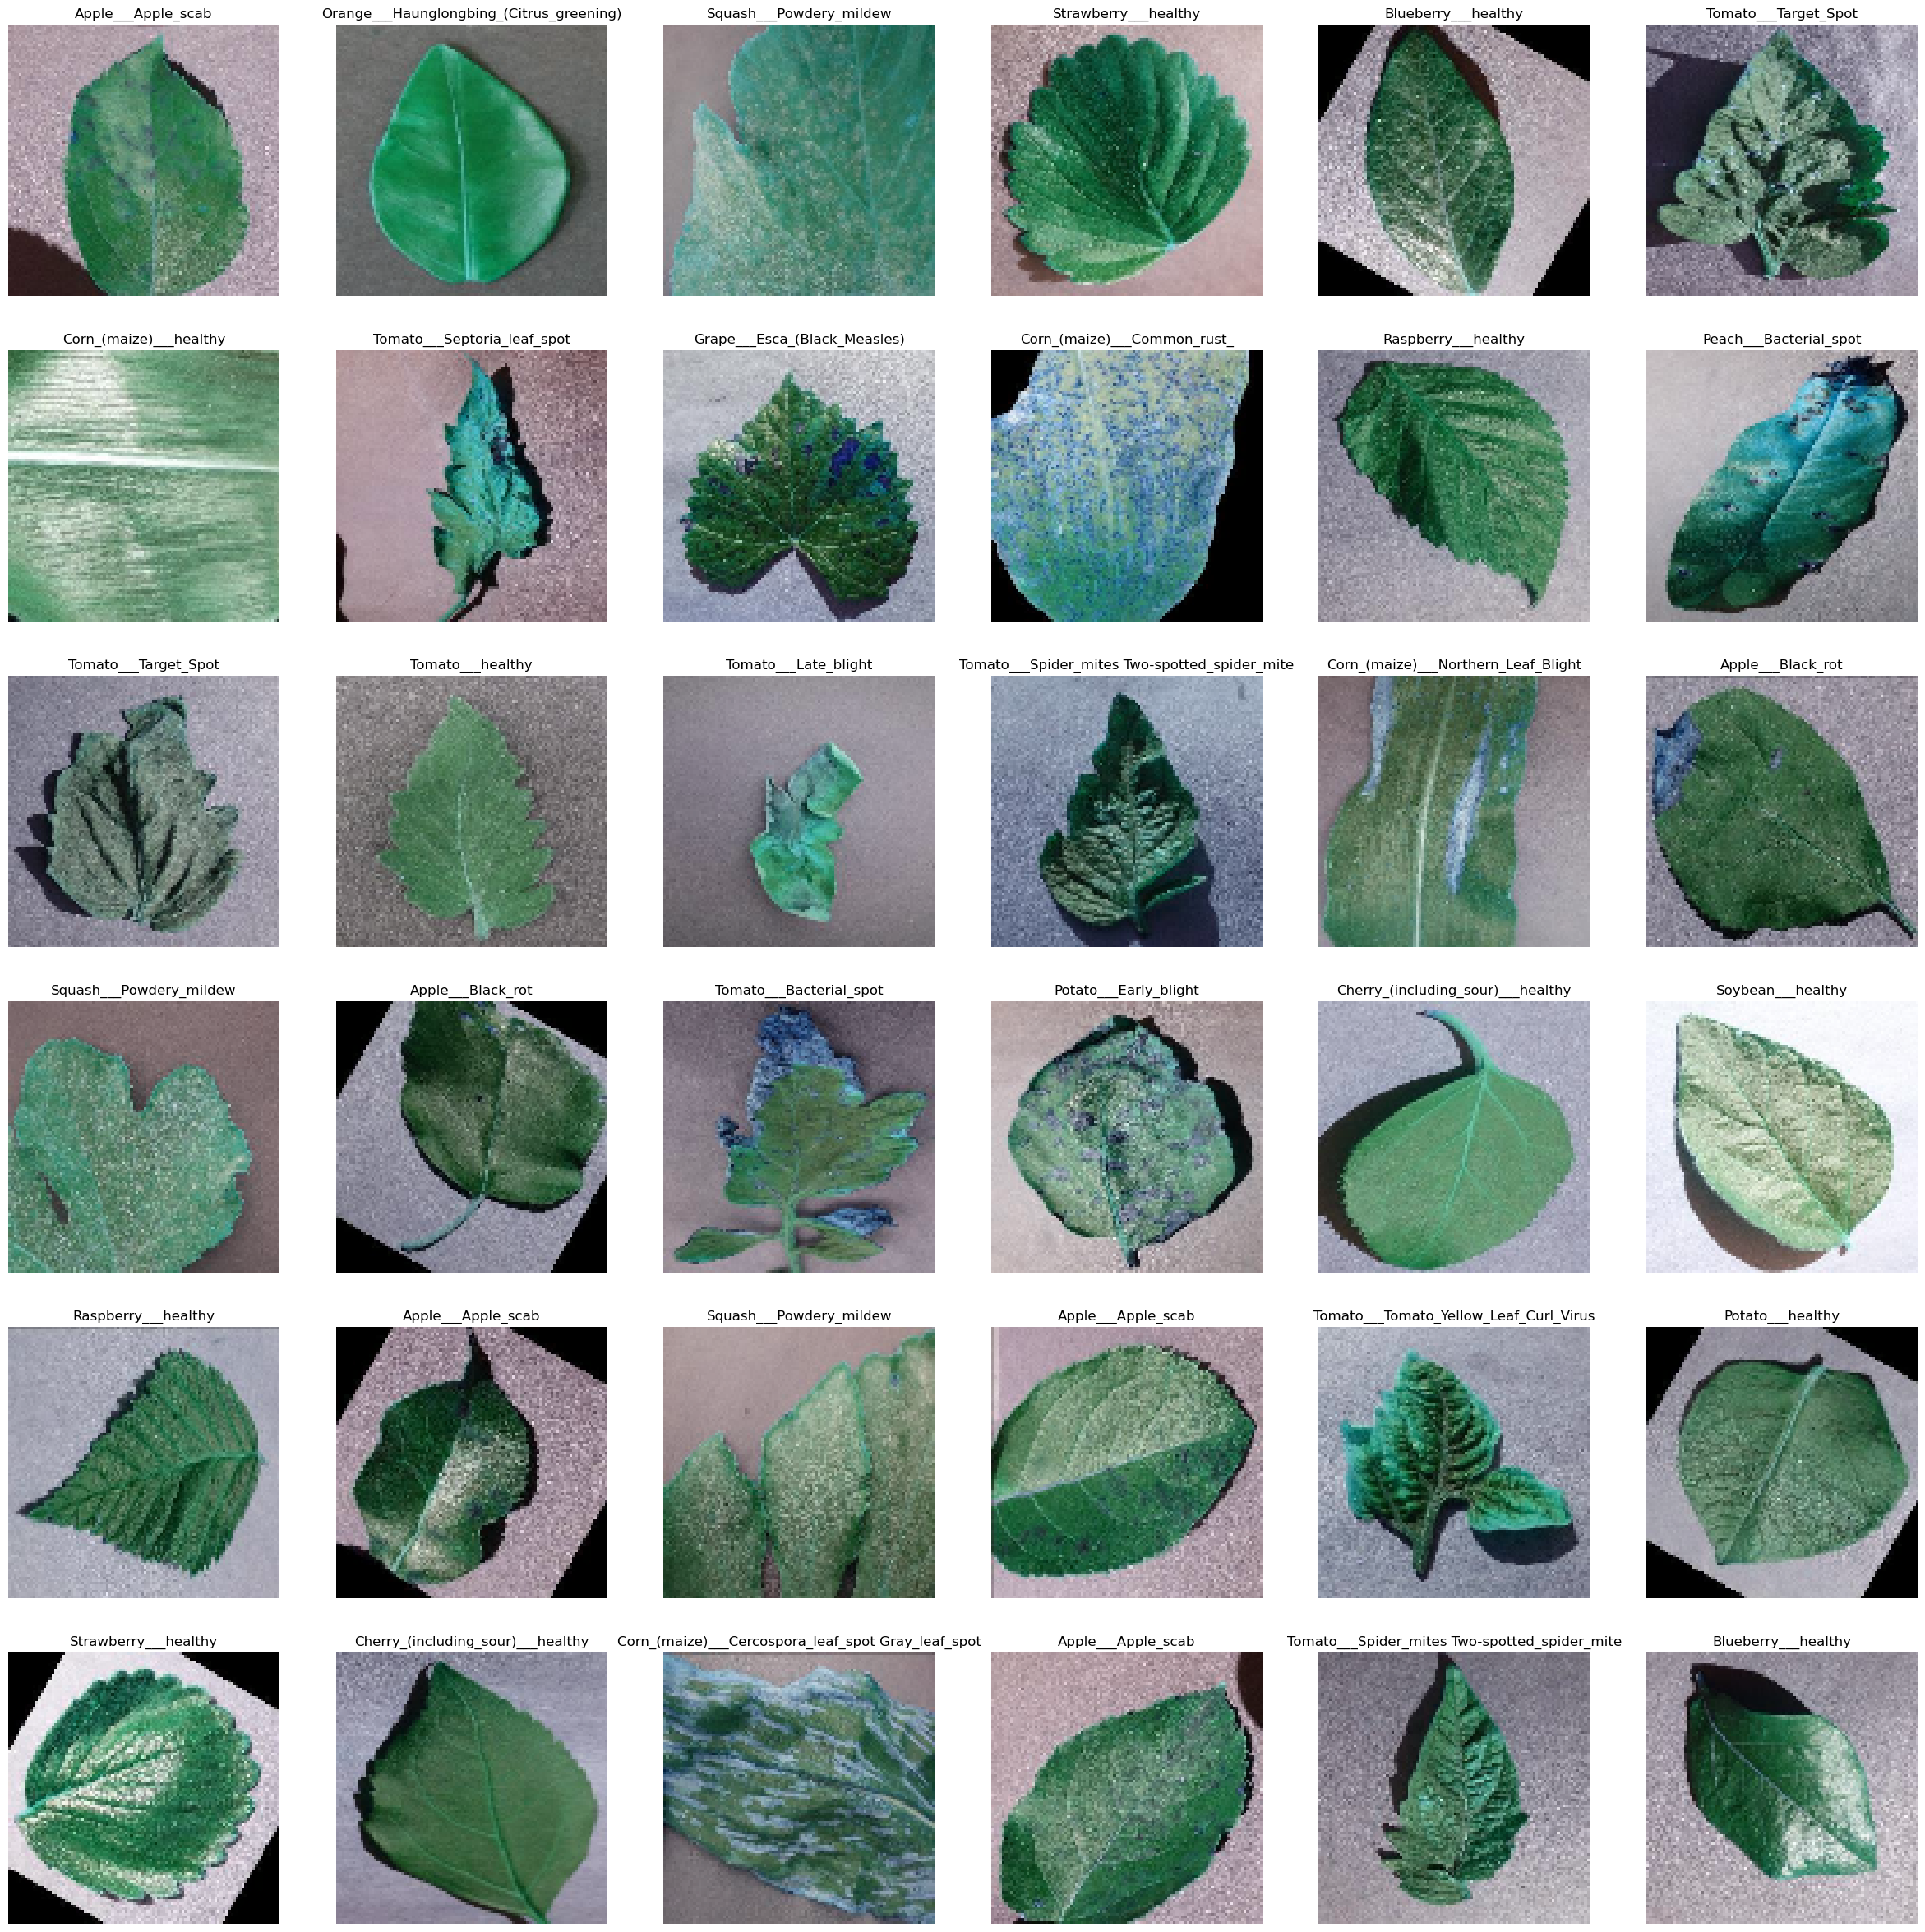

In [32]:
plt.figure(figsize=(30,30))
for n , i in enumerate(list(np.random.randint(0,len(X_train),36))):
    plt.subplot(6,6,n+1)
    plt.imshow(X_train[i])
    plt.axis('off')
    plt.title(getcode(Y_train[i]))

# Reading and Visualization Test Data

In [33]:
X_test=[]
Y_test=[]
for folder in tqdm(os.listdir(testpath)):
    files = gb.glob(pathname= str(testpath + "/" + folder + "/*.JPG")) #+ \
#             gb.glob(os.path.join(testpath, folder, '*.jpg'))
    for file in files :
        image = cv2.imread(file)
        image_resized = cv2.resize(image,(s,s))
        X_test.append(list(image_resized))
        Y_test.append(code[folder])

100%|██████████████████████████████████████████████████████████████████████████████████| 38/38 [00:27<00:00,  1.36it/s]


In [34]:
print(np.array(X_test).shape)
print(np.array(Y_test).shape)

(17572, 100, 100, 3)
(17572,)


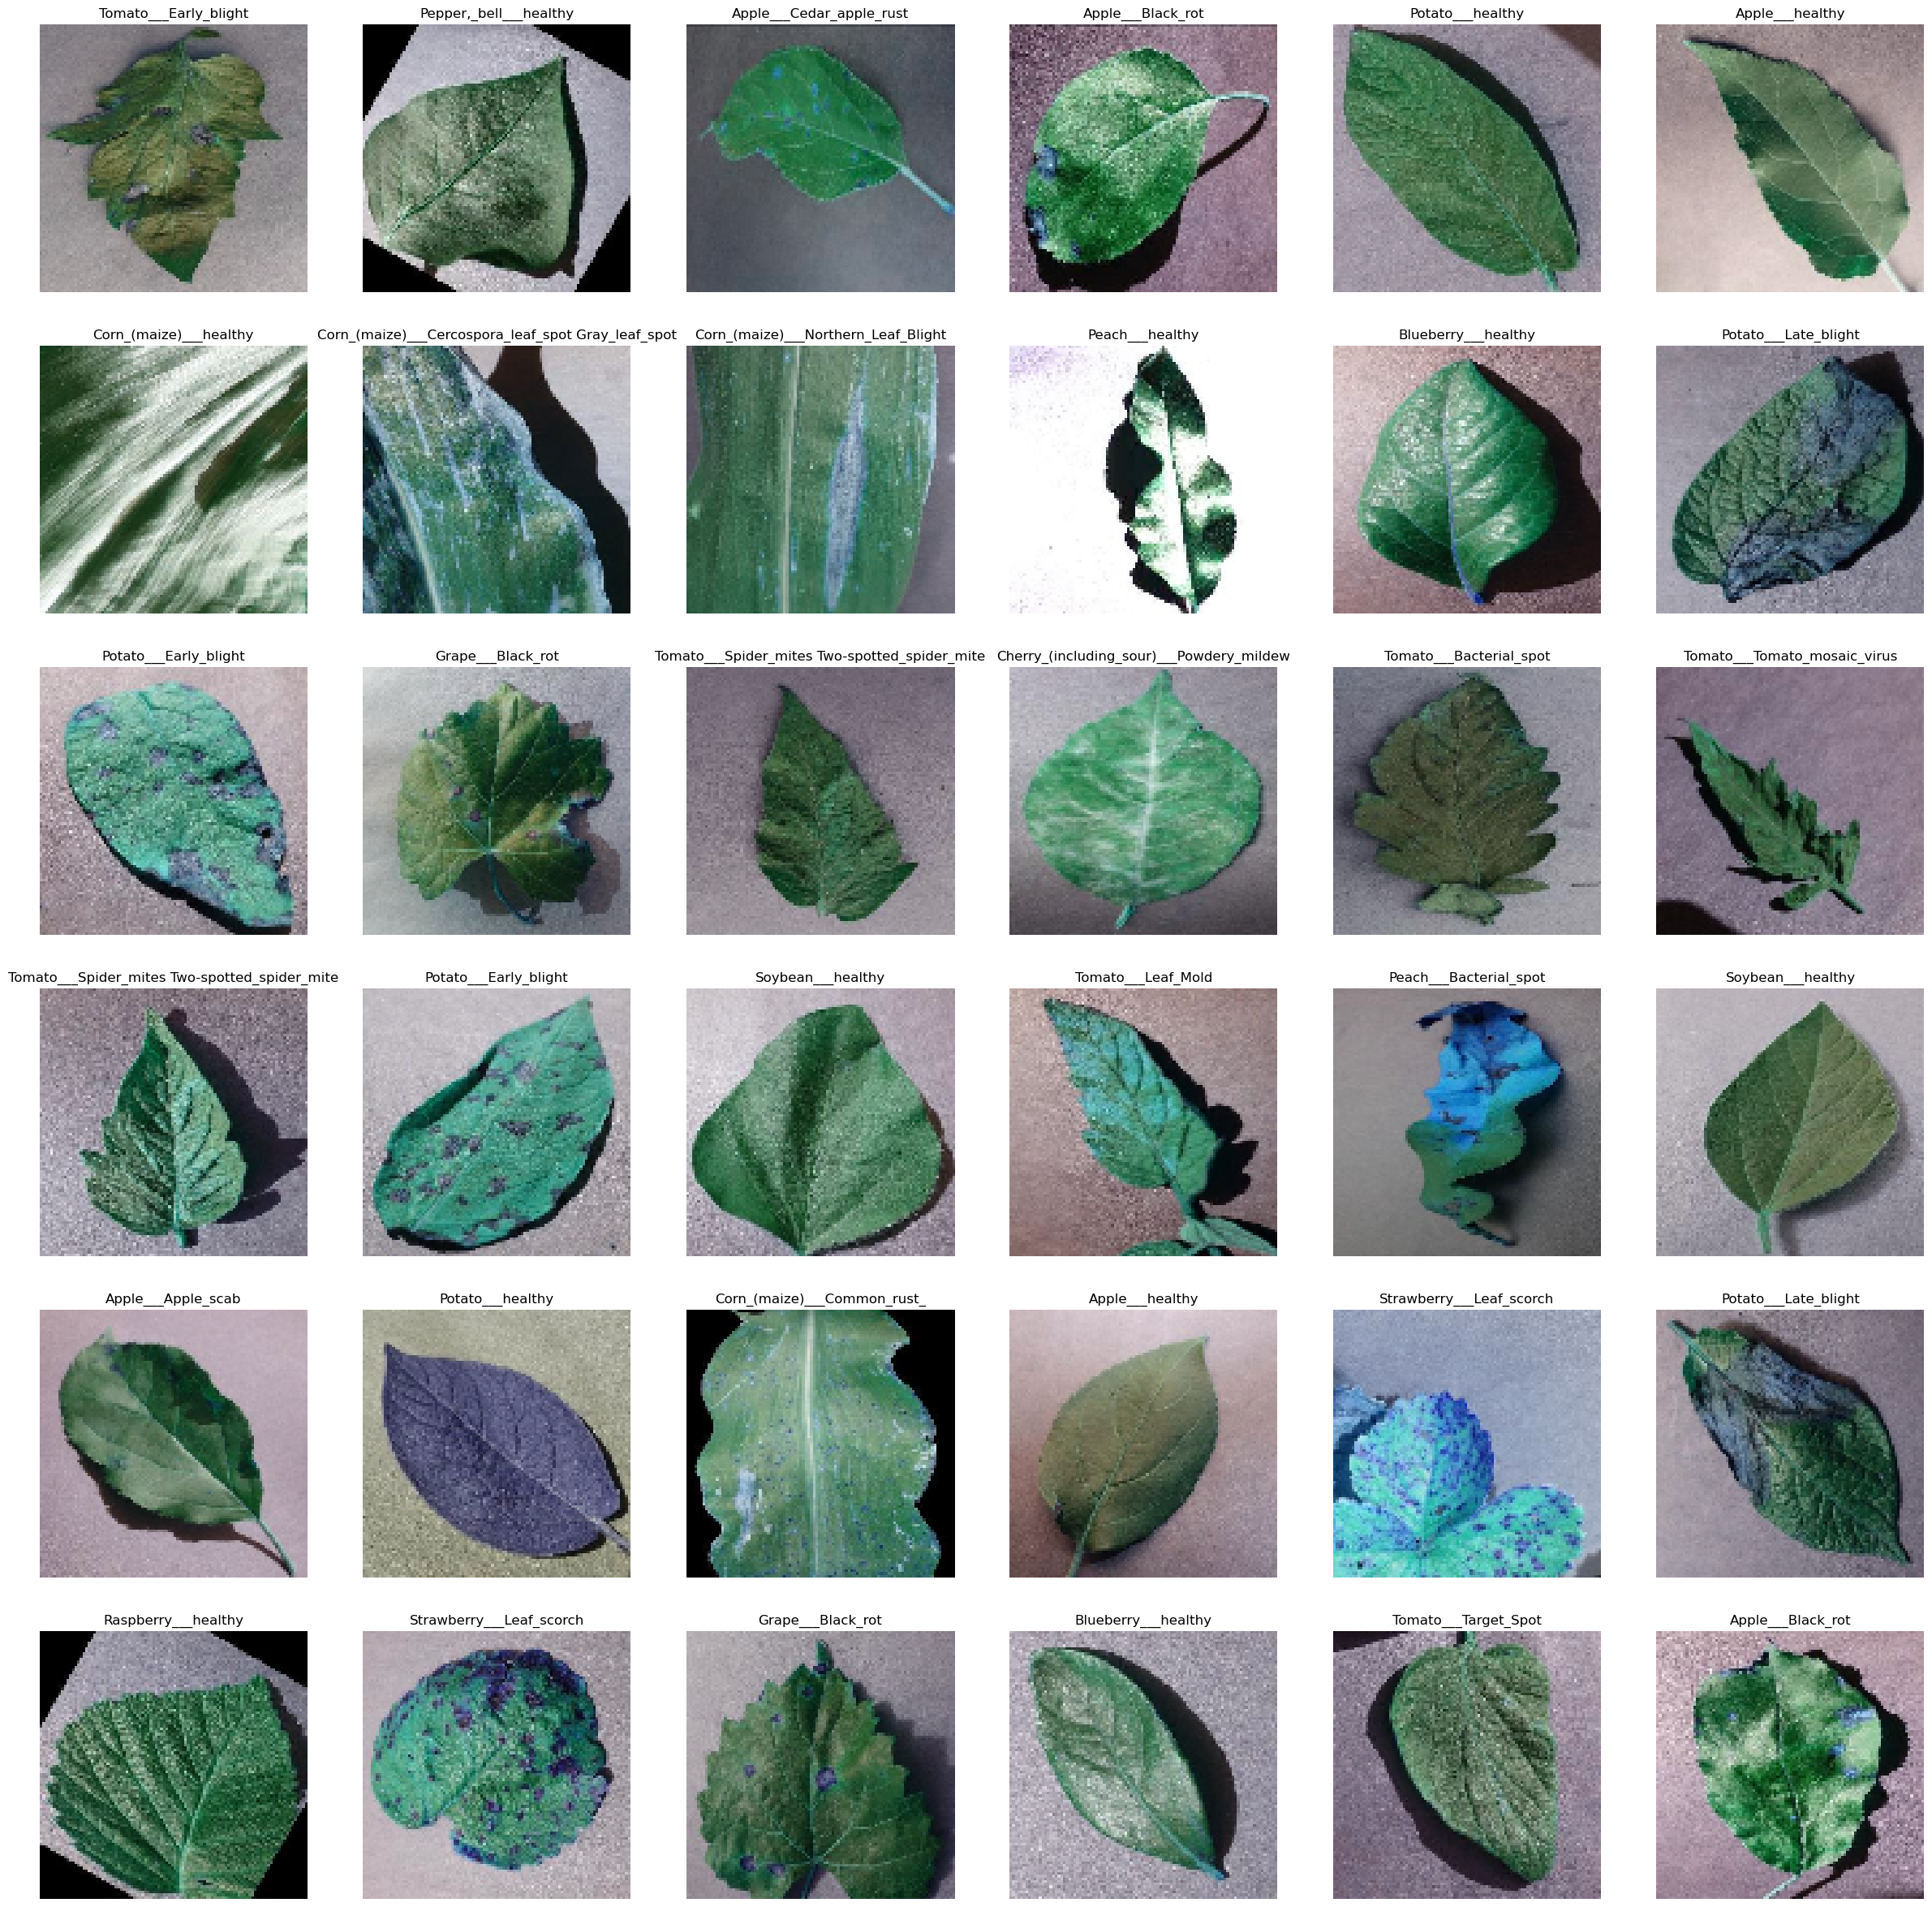

In [35]:
plt.figure(figsize=(30,30))
for n , i in enumerate(list(np.random.randint(0,len(X_test),36))):
    plt.subplot(6,6,n+1)
    plt.imshow(X_test[i])
    plt.axis('off')
    plt.title(getcode(Y_test[i]))

In [36]:
print(np.unique(Y_train))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37]


In [37]:
print(np.unique(Y_test))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37]


# Reading and Visualization Pred. Data

In [38]:
X_pred = []
files = gb.glob(pathname= str(predpath  + "/*.JPG"))
for file in files :
    image = cv2.imread(file)
    image_resized = cv2.resize(image,(s,s))
    X_pred.append(list(image_resized))

In [39]:
print(np.array(X_pred).shape)

(33, 100, 100, 3)


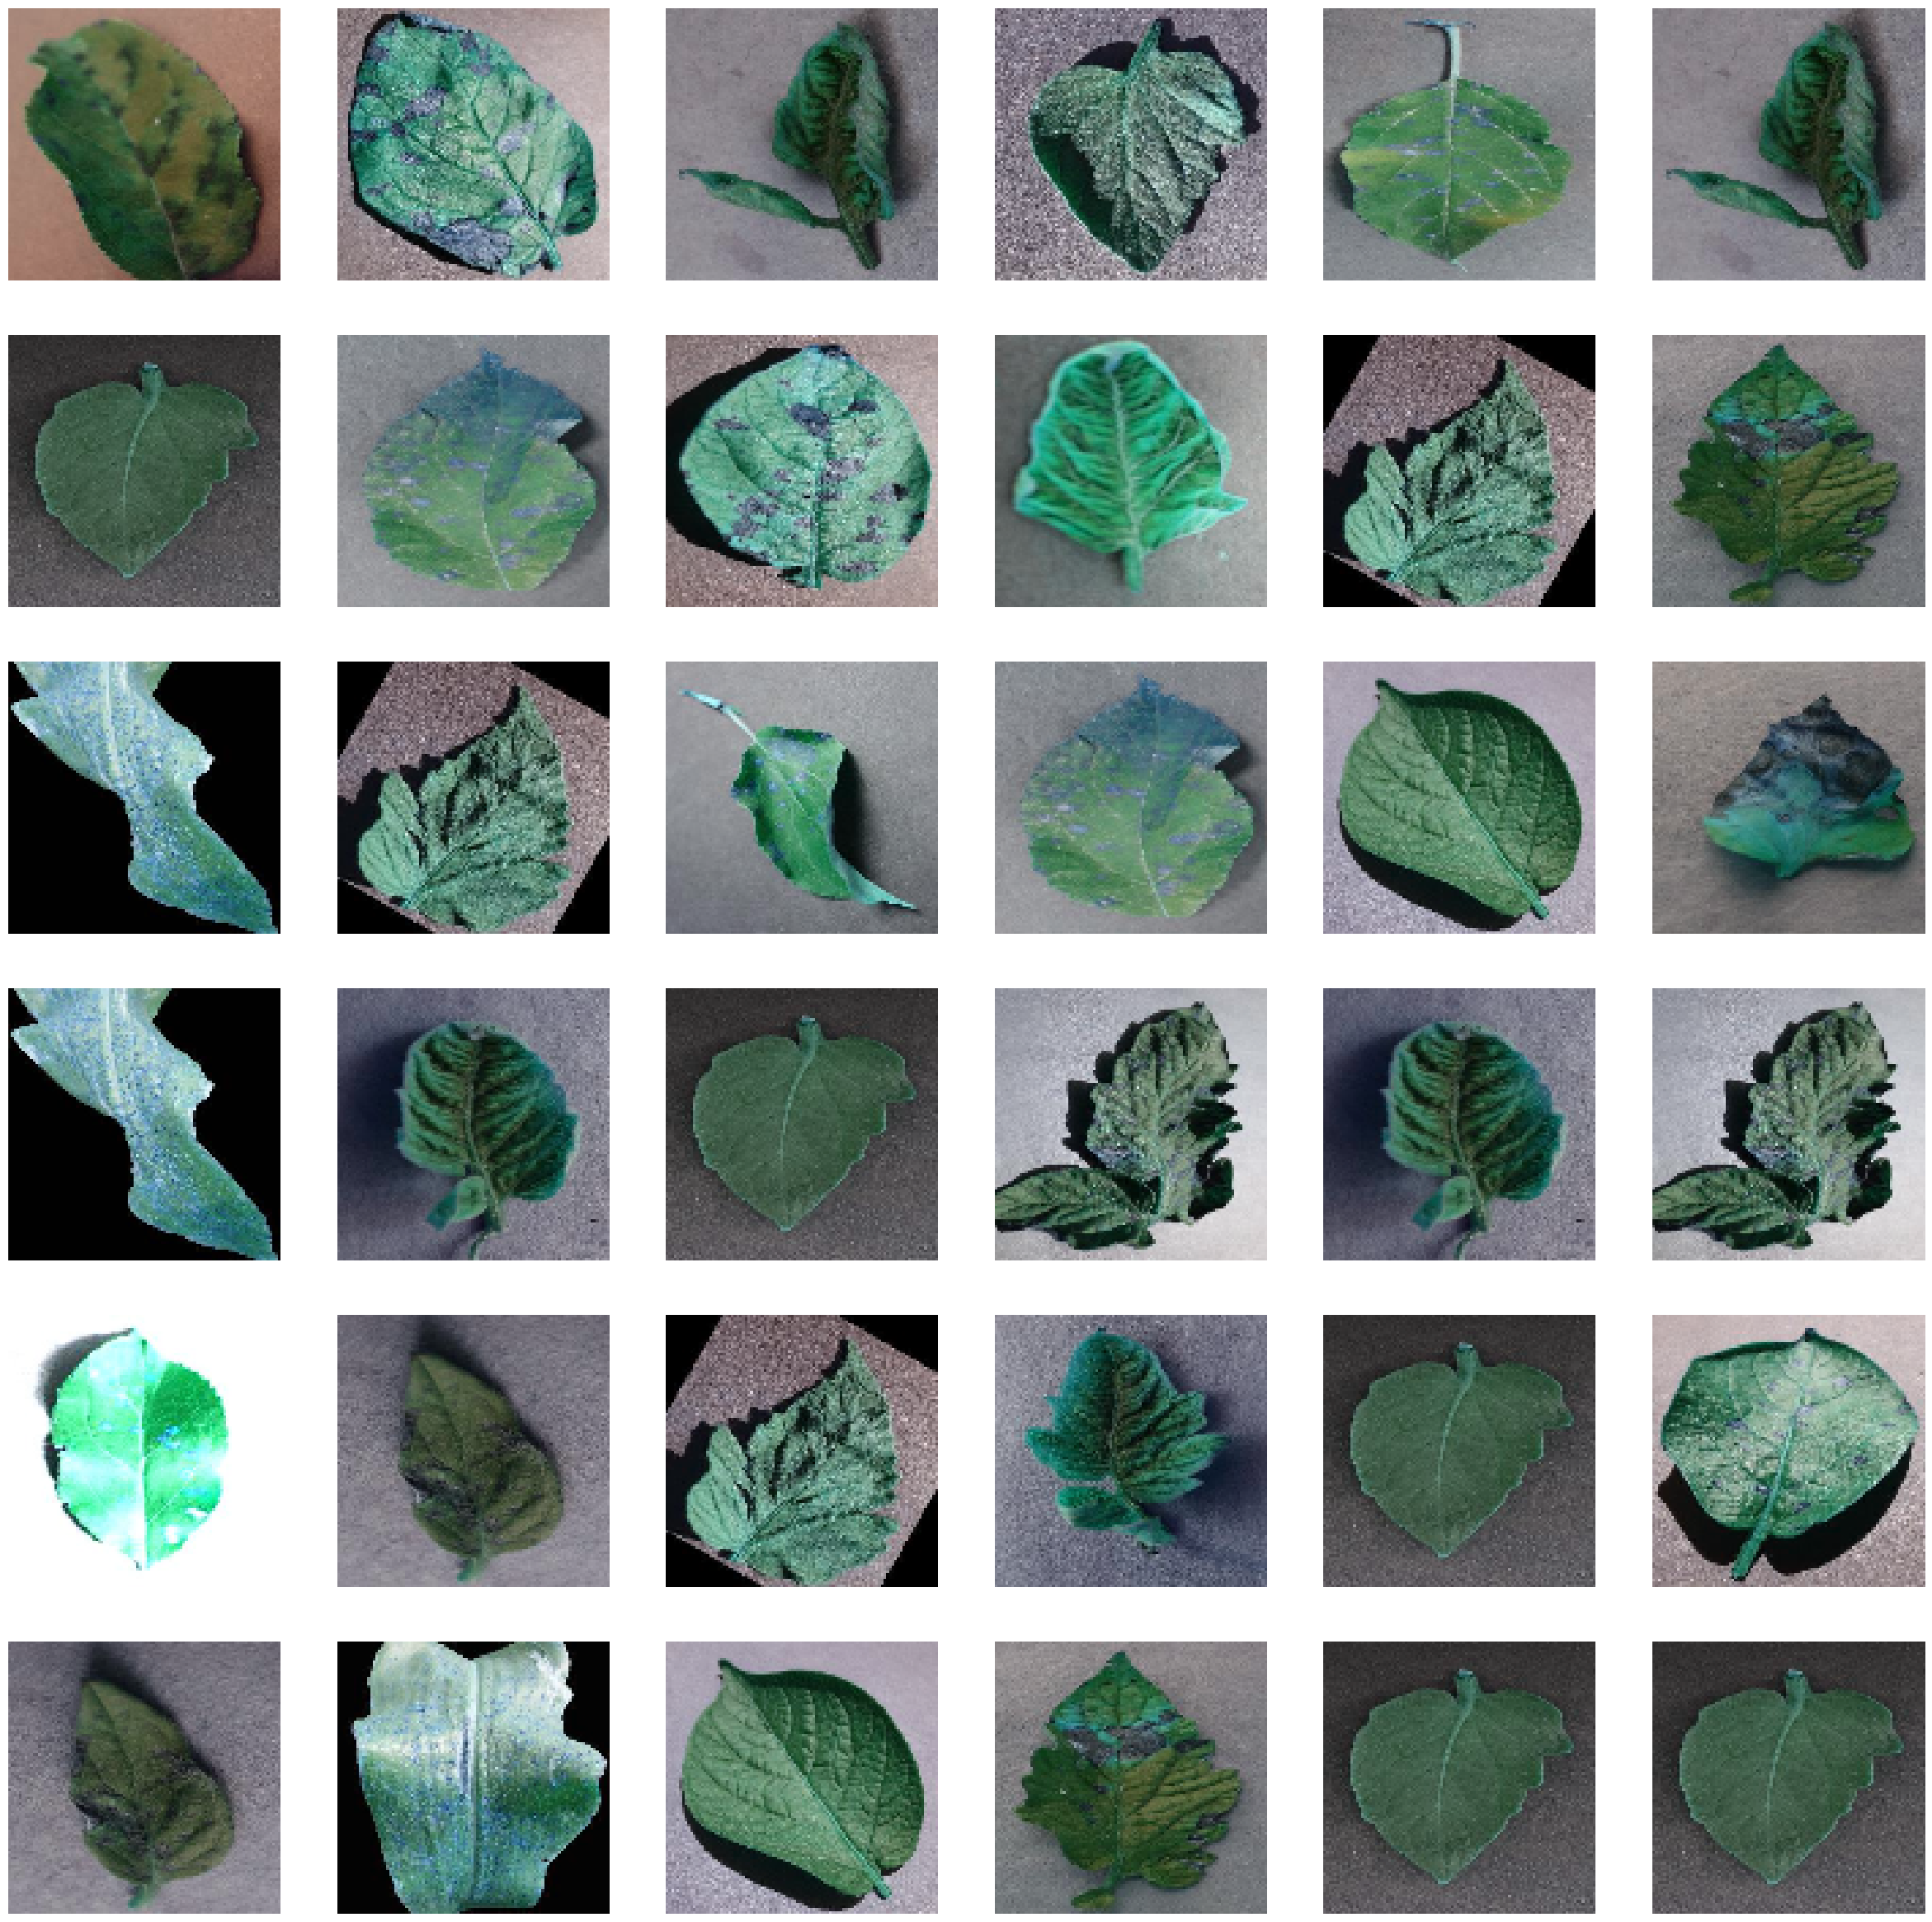

In [40]:
plt.figure(figsize=(30,30))
for n , i in enumerate(list(np.random.randint(0,len(X_pred),36))):
    plt.subplot(6,6,n+1)
    plt.imshow(X_pred[i])
    plt.axis('off')

# Preprocess the data

In [41]:
X_train=np.array(X_train)
Y_train=np.array(Y_train)
X_test=np.array(X_test)
Y_test=np.array(Y_test)
X_pred=np.array(X_pred)


In [42]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)
print(X_pred.shape)

(70295, 100, 100, 3)
(70295,)
(17572, 100, 100, 3)
(17572,)
(33, 100, 100, 3)


In [43]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
X_pred =X_pred.astype('float32') / 255.0

In [44]:
Y_train = keras.utils.to_categorical(Y_train, 38)
Y_test = keras.utils.to_categorical(Y_test, 38)

In [45]:
print(np.unique(Y_train))
print(np.unique(Y_test))

[0. 1.]
[0. 1.]


# Building CNN Model

In [52]:
model = keras.models.Sequential([
    keras.layers.Conv2D(32,kernel_size=(3,3),activation="relu",input_shape=(s,s,3)),
    keras.layers.MaxPool2D(4,4),
    keras.layers.Conv2D(64,kernel_size=(3,3),activation="relu"),
    keras.layers.MaxPool2D(4,4),
    keras.layers.Flatten(),
    keras.layers.Dense(128,activation="relu"),
    keras.layers.Dense(38,activation="softmax"),
])

In [53]:
print("Model Details :")
print(model.summary())

Model Details :
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 24, 24, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 22, 22, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_2 (Dense)             (None, 12

# Compiling Model

In [54]:
model.compile(optimizer=keras.optimizers.Adam(lr=0.001),loss="categorical_crossentropy",metrics=["accuracy"])

# Fitting Model

In [55]:
history=model.fit(X_train,Y_train,epochs=10,batch_size=64,verbose=1)

Epoch 1/10
1099/1099 [==============================] - 148s 135ms/step - loss: 1.4132 - accuracy: 0.5934
Epoch 2/10
1099/1099 [==============================] - 145s 132ms/step - loss: 0.5767 - accuracy: 0.8231
Epoch 3/10
1099/1099 [==============================] - 152s 138ms/step - loss: 0.4038 - accuracy: 0.8723
Epoch 4/10
1099/1099 [==============================] - 146s 132ms/step - loss: 0.3093 - accuracy: 0.9007
Epoch 5/10
1099/1099 [==============================] - 142s 130ms/step - loss: 0.2507 - accuracy: 0.9187
Epoch 6/10
1099/1099 [==============================] - 144s 131ms/step - loss: 0.2061 - accuracy: 0.9326
Epoch 7/10
1099/1099 [==============================] - 142s 130ms/step - loss: 0.1749 - accuracy: 0.9422
Epoch 8/10
1099/1099 [==============================] - 142s 129ms/step - loss: 0.1494 - accuracy: 0.9503
Epoch 9/10
1099/1099 [==============================] - 154s 140ms/step - loss: 0.1347 - accuracy: 0.9544
Epoch 10/10
1099/1099 [=======================

# Evaluating Model

In [56]:
loss,acc=model.evaluate(X_test,Y_test)

550/550 [==============================] - 12s 21ms/step - loss: 0.1778 - accuracy: 0.9422


# Predicted Model

In [57]:
pred = model.predict(X_test)

550/550 [==============================] - 12s 21ms/step


In [58]:
print("Y_test shape: ", Y_test.shape)
print("pred shape: ", pred.shape)

Y_test shape:  (17572, 38)
pred shape:  (17572, 38)


# Accuracy Measures

In [59]:
print("Train Accuracy  : {:.2f} %".format(history.history['accuracy'][-1]*100))
print("Test Accuracy   : {:.2f} %".format(accuracy_score(Y_test.argmax(axis=1), pred.argmax(axis=1)) * 100))
print("Precision Score : {:.2f} %".format(precision_score(Y_test.argmax(axis=1), pred.argmax(axis=1), average='micro') * 100))
print("Recall Score    : {:.2f} %".format(recall_score(Y_test.argmax(axis=1), pred.argmax(axis=1), average='micro') * 100))
print("F1 Score        : {:.2f} %".format(f1_score(Y_test.argmax(axis=1), pred.argmax(axis=1), average='micro') * 100))


Train Accuracy  : 96.20 %
Test Accuracy   : 94.22 %
Precision Score : 94.22 %
Recall Score    : 94.22 %
F1 Score        : 94.22 %


<Figure size 2000x500 with 0 Axes>

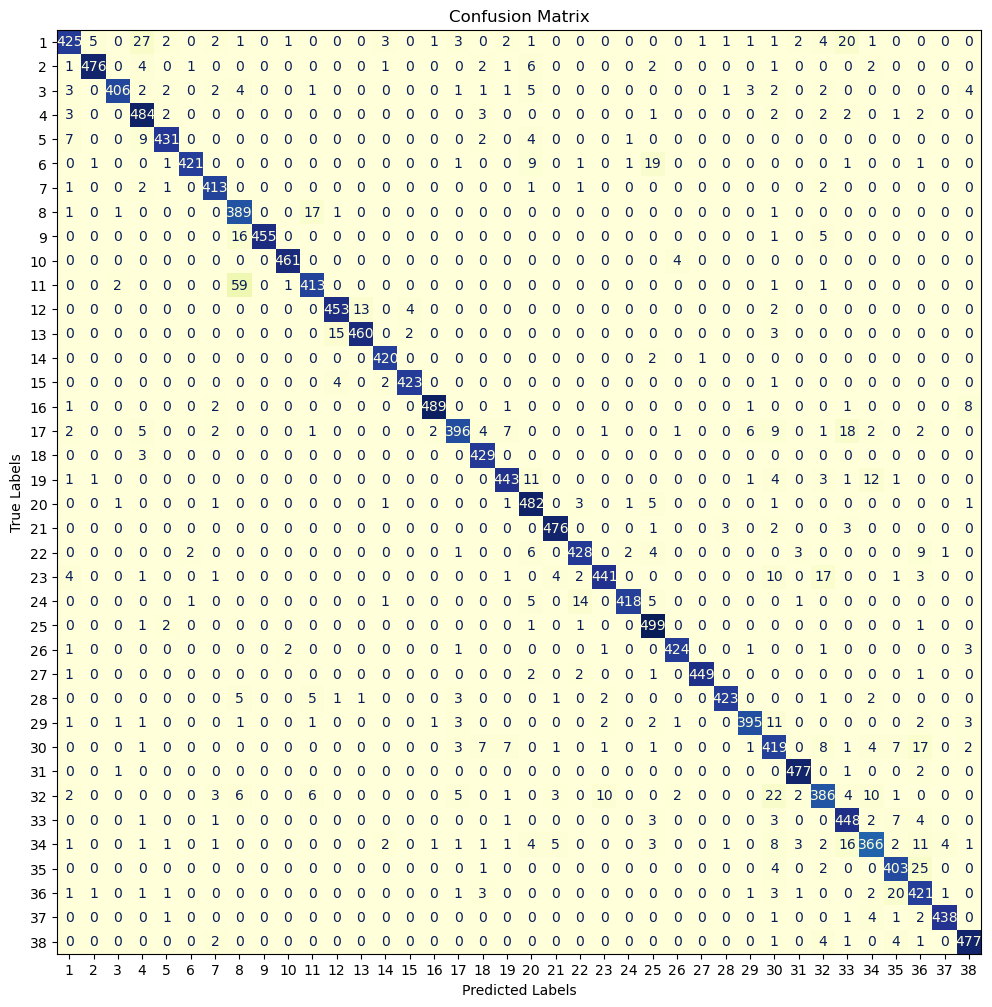

In [60]:
plt.figure(figsize= (20,5))
cm = confusion_matrix(Y_test.argmax(axis=1), pred.argmax(axis=1))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=list(range(1,39)))
fig, ax = plt.subplots(figsize=(12,12))
disp.plot(ax=ax,colorbar= False,cmap = 'YlGnBu')
plt.title("Confusion Matrix")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Accuracy Plot

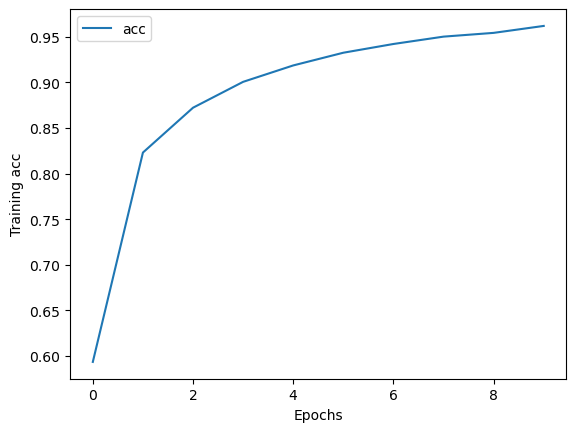

<Figure size 640x480 with 0 Axes>

In [61]:
plt.plot(history.history['accuracy'], label='acc')
#plt.plot(history.history['val_accuracy'], label='val_acc')
plt.xlabel('Epochs')
plt.ylabel('Training acc')
plt.legend()
plt.show()
plt.savefig("Accuracy plot.jpg")

# Loss Plot

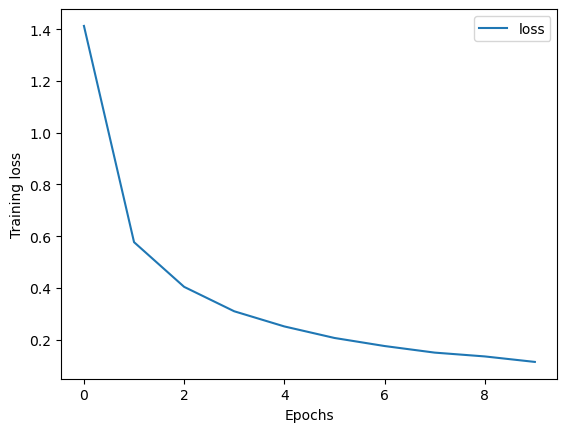

<Figure size 640x480 with 0 Axes>

In [62]:
plt.plot(history.history['loss'], label='loss')
#plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.legend()
plt.show()
plt.savefig("Loss plot.jpg")

# Saving Model

In [63]:
model.save("D:/Neural/Project/New Plant Diseases Model.h5")

# Predicting Data

In [64]:
Y_pred = model.predict(X_pred)

2/2 [==============================] - 0s 4ms/step


In [65]:
print(np.array(Y_pred).shape)

(33, 38)


In [66]:
Y_pred

array([[3.4745977e-11, 2.0220366e-17, 9.7579306e-01, ..., 1.6665769e-11,
        2.8716359e-17, 1.1371230e-10],
       [2.5139998e-03, 1.6938560e-06, 8.8396561e-01, ..., 1.9669574e-07,
        3.3895784e-17, 1.8760174e-13],
       [4.9784248e-06, 2.3884097e-10, 9.5727342e-01, ..., 1.4962033e-06,
        2.7573579e-12, 2.1031931e-07],
       ...,
       [5.3235008e-14, 3.7238337e-24, 4.6048743e-14, ..., 8.9905644e-13,
        6.2721587e-15, 1.0000000e+00],
       [1.4539076e-12, 1.1032340e-24, 9.9592057e-11, ..., 3.3771088e-17,
        3.2937973e-25, 9.9999142e-01],
       [1.9478608e-17, 9.1604155e-26, 4.3525618e-14, ..., 3.6979559e-17,
        1.2975970e-21, 1.0000000e+00]], dtype=float32)

In [67]:
files = gb.glob(pathname= str(predpath + "/*.JPG"))#+ \
#             gb.glob(os.path.join(predpath, folder, '*.jpg'))
l=[]

for i in files :
    file_path = i
    split_path = str(file_path).split("\\")
    l.append(split_path[-1].split(".")[0])
print(l)

['AppleCedarRust1', 'AppleCedarRust2', 'AppleCedarRust3', 'AppleCedarRust4', 'AppleScab1', 'AppleScab2', 'AppleScab3', 'CornCommonRust1', 'CornCommonRust2', 'CornCommonRust3', 'PotatoEarlyBlight1', 'PotatoEarlyBlight2', 'PotatoEarlyBlight3', 'PotatoEarlyBlight4', 'PotatoEarlyBlight5', 'PotatoHealthy1', 'PotatoHealthy2', 'TomatoEarlyBlight1', 'TomatoEarlyBlight2', 'TomatoEarlyBlight3', 'TomatoEarlyBlight4', 'TomatoEarlyBlight5', 'TomatoEarlyBlight6', 'TomatoHealthy1', 'TomatoHealthy2', 'TomatoHealthy3', 'TomatoHealthy4', 'TomatoYellowCurlVirus1', 'TomatoYellowCurlVirus2', 'TomatoYellowCurlVirus3', 'TomatoYellowCurlVirus4', 'TomatoYellowCurlVirus5', 'TomatoYellowCurlVirus6']


In [68]:
labels=[]
for i in Y_pred :
    labels.append(getcode(np.argmax(i)))

In [69]:
labels

['Apple___Cedar_apple_rust',
 'Apple___Cedar_apple_rust',
 'Apple___Cedar_apple_rust',
 'Apple___Cedar_apple_rust',
 'Grape___healthy',
 'Apple___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Common_rust_',
 'Potato___Early_blight',
 'Potato___Early_blight',
 'Soybean___healthy',
 'Potato___Early_blight',
 'Potato___Early_blight',
 'Potato___healthy',
 'Potato___healthy',
 'Tomato___Early_blight',
 'Tomato___Early_blight',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___Early_blight',
 'Tomato___Early_blight',
 'Tomato___Spider_mites Two-spotted_spider_mite',
 'Tomato___healthy',
 'Tomato___healthy',
 'Tomato___healthy',
 'Tomato___healthy',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_Yell

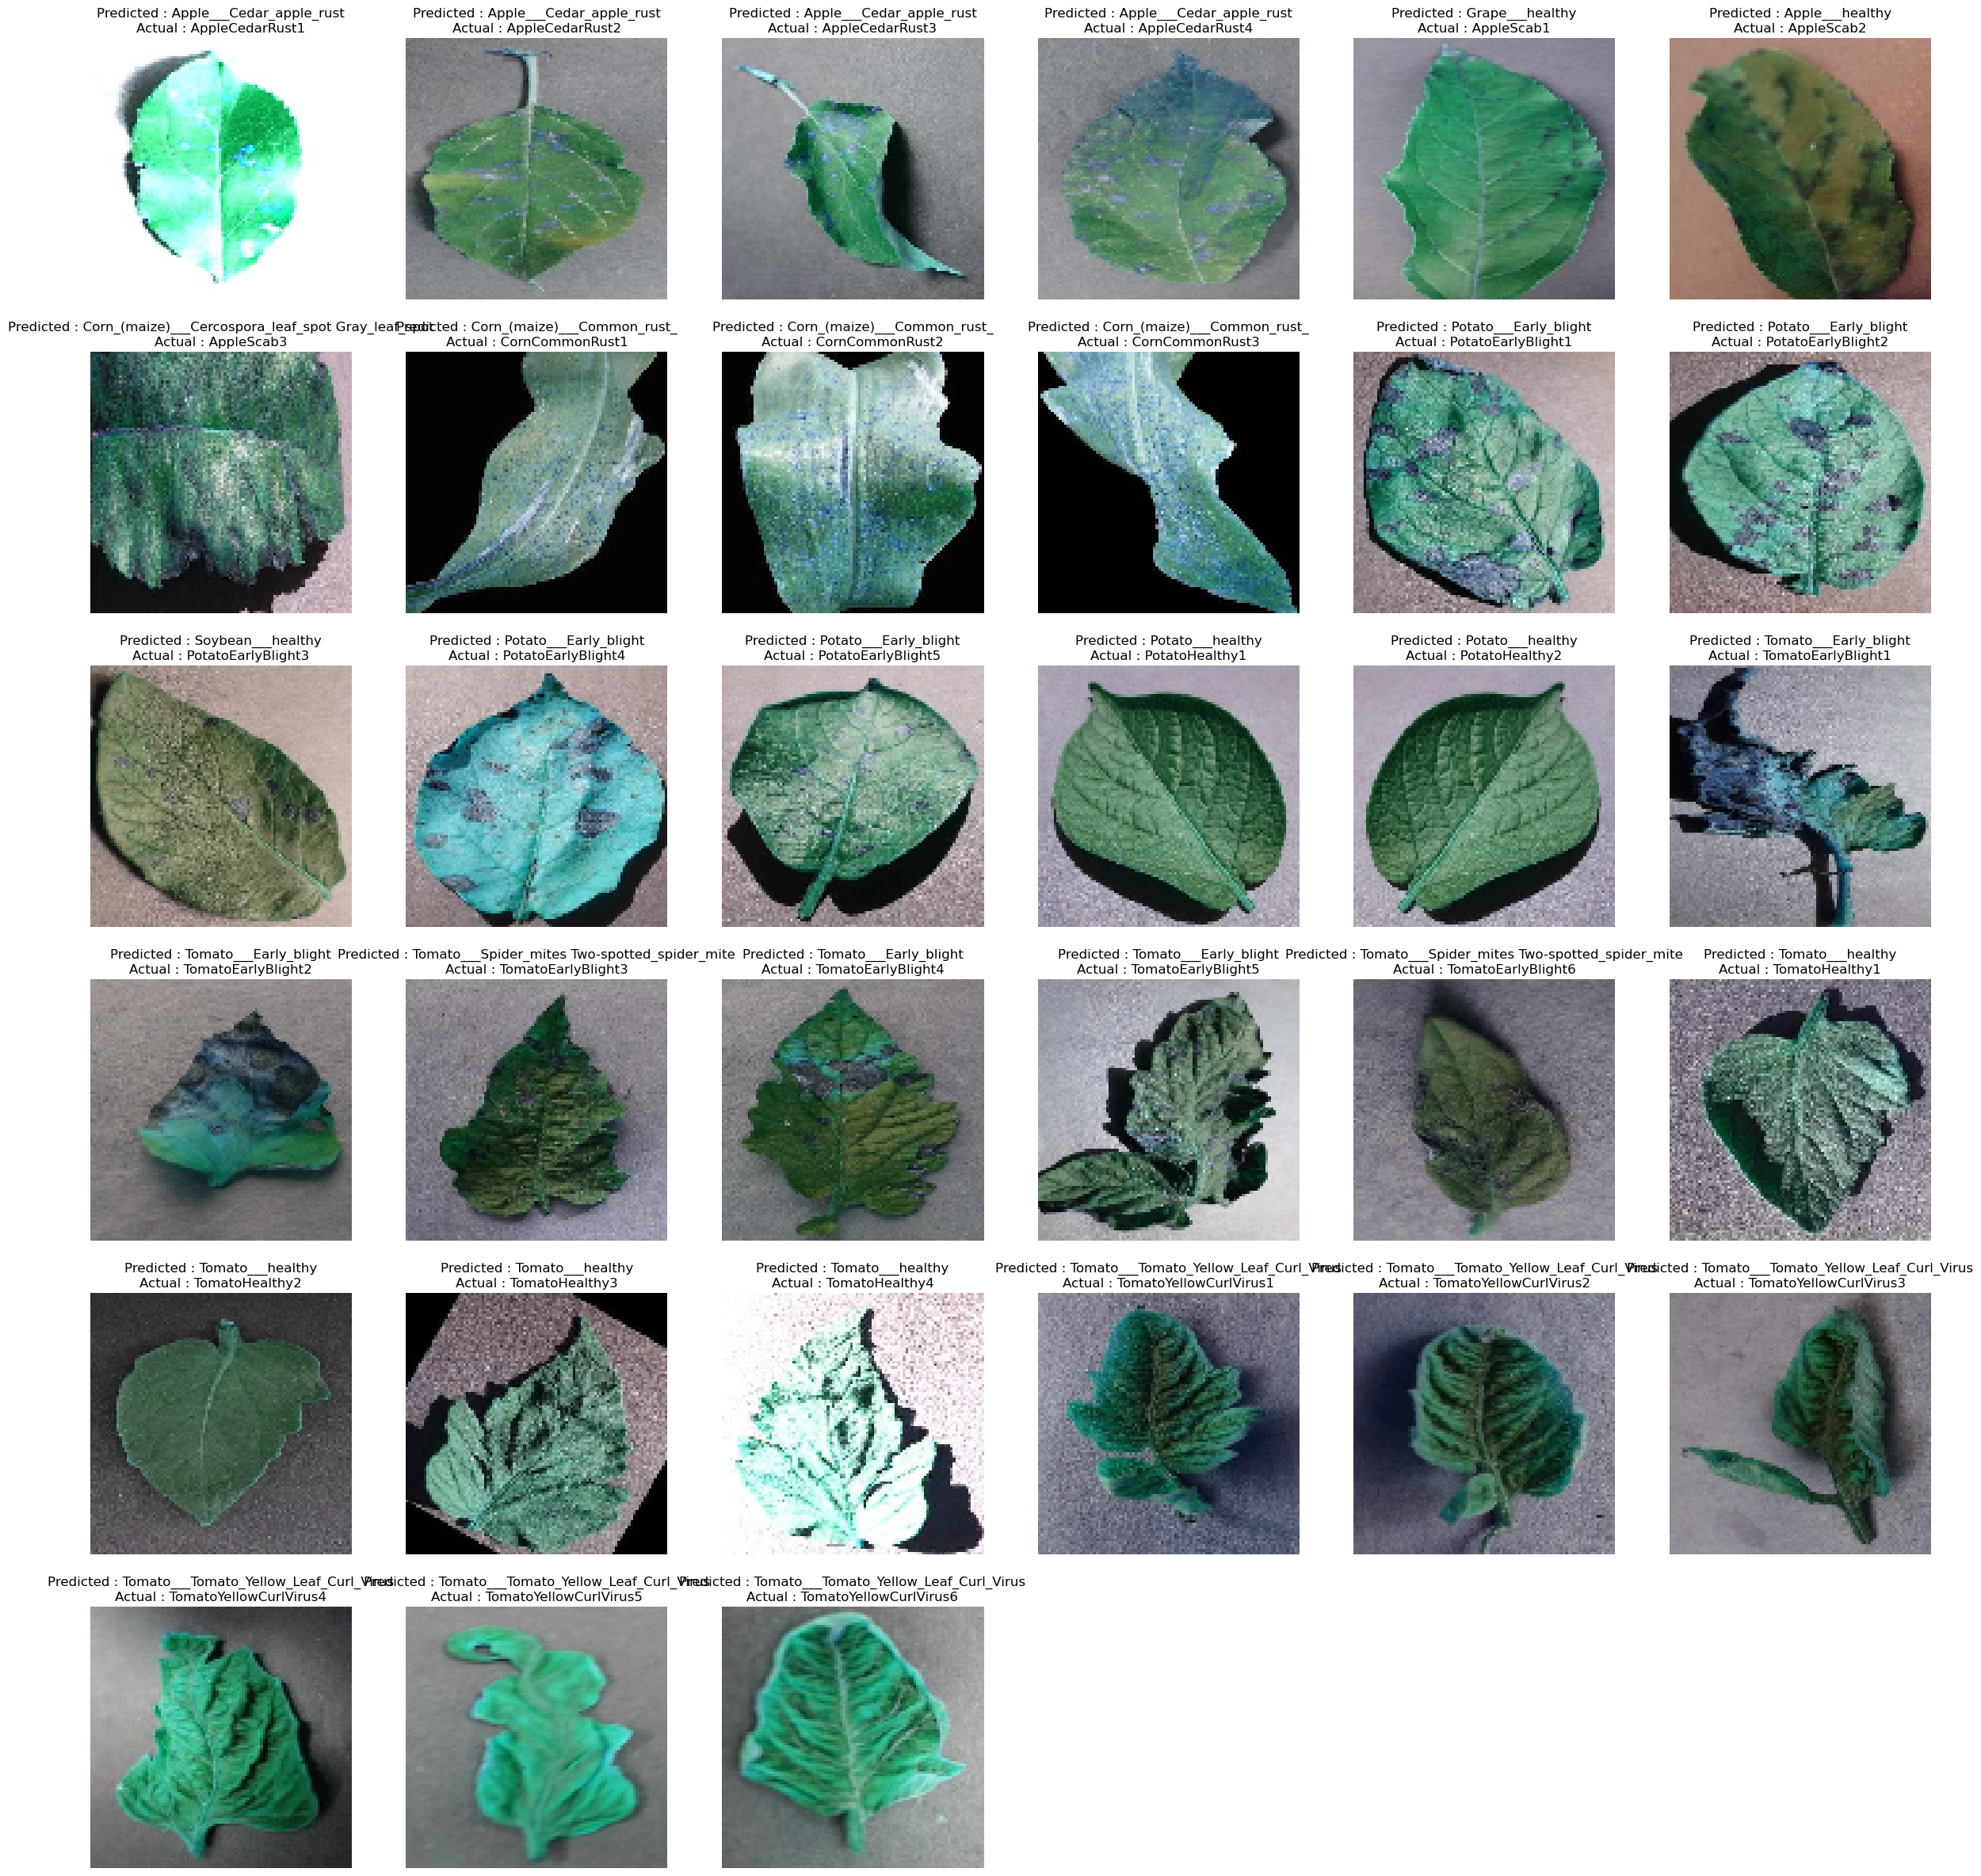

In [70]:
plt.figure(figsize=(30,30))
for i in range(33) :
    plt.subplot(6,6,i+1)
    plt.imshow(np.array(X_pred)[i])
    plt.axis('off')
    plt.title("Predicted : "+str(getcode(np.argmax(Y_pred[i])))+"\n"+"Actual : "+str(l[i]))